In [7]:
import urllib2
from bs4 import BeautifulSoup
import re
import pandas as pd
from random import randint
from time import sleep
from sklearn.linear_model import LinearRegression
from patsy import dmatrices
import statsmodels.formula.api as smf
import numpy as np
from dateutil import parser
import datetime
import matplotlib.pyplot as plt 
import random
from pandas.tools.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
sns.set_palette("deep", desat=.8)
sns.set_context(rc={"figure.figsize": (14, 8)})


In [8]:
def top100_soup(num):
    '''pull in url and create soup obj'''
    yr = str(num)
    url = 'http://www.boxofficemojo.com/yearly/chart/?yr='+ yr + '&p=.htm'
    page = urllib2.urlopen(url)
    soup = BeautifulSoup(page)
    return soup


In [47]:

def remainder_soup(c,years):
    n = str(c)
    yr = str(years)
    sleep(randint(10,100))
    url = 'http://www.boxofficemojo.com/yearly/chart/?page=' + n +'&view=releasedate&view2=domestic&yr=' + yr + '&p=htm'
    page = urllib2.urlopen(url)
    soup = BeautifulSoup(page)
    return soup


http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2010&p=htm


<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">

<html lang="en">
<head>
<title>2010 Yearly Box Office Results - Box Office Mojo</title>
<meta content="2010, year, yearly, box, office, result, list, movie, movies, listing, listings, top movies, all time, film" name="keywords">
<meta content="Yearly box office results for 2010." name="description">
<link charset="utf-8" href="/css/mojo.css?1" media="screen" rel="stylesheet" title="no title" type="text/css">
<link charset="utf-8" href="/css/mojo.css?1" media="print" rel="stylesheet" title="no title" type="text/css"/></link></meta></meta></head>
<body>
<iframe frameborder="0" height="1" id="sis_pixel_sitewide" marginheight="0" marginwidth="0" style="display: none;" width="1"></iframe>
<script>
    setTimeout(function(){
        try{
            //sis3.0 pixel
            var cacheBust = Math.random() * 10000000000000000,
                url_sis3 = 'http://s.amazon-adsystem.com/iu3?',


In [39]:
def top_movies_urls(soup):
    '''pull <a href line from soup and formatt url'''
    all_movies = []
    all_urls = []
    for link in soup.find('table', {'cellpadding':'5'}).find_all('a', href = True):
        if "/movies/?id=" in link['href']:
            all_movies.append(link)
            
    for element in all_movies:
        test1 = str(element).split("=",1)
        test2 = test1[1].split(">")
        url = ("http://www.boxofficemojo.com" + test2[0]).replace('"','')
        all_urls.append(url)
    return all_urls


http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2010&p=htm
['http://www.boxofficemojo.com/movies/?id=anjaanaanjaani.htm', 'http://www.boxofficemojo.com/movies/?id=ihateluvstorys.htm', 'http://www.boxofficemojo.com/movies/?id=whatif.htm', 'http://www.boxofficemojo.com/movies/?id=tillmanstory.htm', 'http://www.boxofficemojo.com/movies/?id=peeplilive.htm', 'http://www.boxofficemojo.com/movies/?id=middlemen.htm', 'http://www.boxofficemojo.com/movies/?id=northface.htm', 'http://www.boxofficemojo.com/movies/?id=raavan.htm', 'http://www.boxofficemojo.com/movies/?id=secretofkells.htm', 'http://www.boxofficemojo.com/movies/?id=midaugustlunch.htm', 'http://www.boxofficemojo.com/movies/?id=polarexpressimax10.htm', 'http://www.boxofficemojo.com/movies/?id=concert.htm', 'http://www.boxofficemojo.com/movies/?id=wearefamily.htm', 'http://www.boxofficemojo.com/movies/?id=virginityhit.htm', 'http://www.boxofficemojo.com/movies/?id=ajami.htm', 'http://www.boxofficemo

['http://www.boxofficemojo.com/movies/?id=anjaanaanjaani.htm',
 'http://www.boxofficemojo.com/movies/?id=ihateluvstorys.htm',
 'http://www.boxofficemojo.com/movies/?id=whatif.htm',
 'http://www.boxofficemojo.com/movies/?id=tillmanstory.htm',
 'http://www.boxofficemojo.com/movies/?id=peeplilive.htm',
 'http://www.boxofficemojo.com/movies/?id=middlemen.htm',
 'http://www.boxofficemojo.com/movies/?id=northface.htm',
 'http://www.boxofficemojo.com/movies/?id=raavan.htm',
 'http://www.boxofficemojo.com/movies/?id=secretofkells.htm',
 'http://www.boxofficemojo.com/movies/?id=midaugustlunch.htm',
 'http://www.boxofficemojo.com/movies/?id=polarexpressimax10.htm',
 'http://www.boxofficemojo.com/movies/?id=concert.htm',
 'http://www.boxofficemojo.com/movies/?id=wearefamily.htm',
 'http://www.boxofficemojo.com/movies/?id=virginityhit.htm',
 'http://www.boxofficemojo.com/movies/?id=ajami.htm',
 'http://www.boxofficemojo.com/movies/?id=agora.htm',
 'http://www.boxofficemojo.com/movies/?id=vincere.h

In [40]:

def get_movie_value(soup, field_name):
    """takes a string attribute of a movie on the movie, and returns the 
    string in the next sibling object"""
    obj = soup.find(text = re.compile(field_name))
    if not obj:
        return None
    next_sibling = obj.findNextSibling()
    if next_sibling:
        return next_sibling.text
    else:
        return None

In [41]:
def get_values(soup, field_names):
    '''takes a list of values and c'''
    field_values = []
    for f in field_names:
        sib_val = get_movie_value(soup, f)
        field_values.append(sib_val)
    return field_values

In [42]:
def title_string(soup):
    '''pulls out the title of the film'''
    title = soup.find("title").text
    title = title.split("(")[0].strip()
    return title

#title_string(soup)

In [43]:
#find domestic total

def domestic_tot(soup):
    dom_tot = soup.find('table', {'cellpadding':'4'}).find('b')
    dom_tot = dom_tot.text
    dom_tot = dom_tot.replace('$', "")
    #print type(dom_tot)
    return dom_tot

#domestic_tot(soup)

In [44]:
def movie_data(urls):
    headers = ["Release Date", "Genre:", "MPAA Rating", "Budget"]
    movie_data = []

    for links in urls:
        movie_data_row = []
        page = urllib2.urlopen(links)
        soup = BeautifulSoup(page)
        movie_data_row.append(title_string(soup))
        movie_data_row.append(domestic_tot(soup))
        movie_data_row.extend(get_values(soup, headers))
        movie_data.append(movie_data_row)
    return movie_data



In [61]:
years = [2010,2011,2012,2013,2014]
#years = 2010
count = [2,3,4,5,6]
final_list = []
for y in years:
    sleep(randint(10,100))
    soup = top100_soup(y)
    urls = top_movies_urls(soup)
    final_list.extend(movie_data(urls))
    print "finished top for year"
    for c in count:
        print "printing remainder of year", c
        sleep(randint(10,100))
        soup = remainder_soup(c,y)
        print "finished soup", c
        urls = top_movies_urls(soup)
        print "finished urls for ",c
        final_list.extend(movie_data(urls))
        print "appended final list"
        


['http://www.boxofficemojo.com/movies/?id=toystory3.htm', 'http://www.boxofficemojo.com/movies/?id=aliceinwonderland10.htm', 'http://www.boxofficemojo.com/movies/?id=ironman2.htm', 'http://www.boxofficemojo.com/movies/?id=eclipse.htm', 'http://www.boxofficemojo.com/movies/?id=harrypotter7.htm', 'http://www.boxofficemojo.com/movies/?id=inception.htm', 'http://www.boxofficemojo.com/movies/?id=despicableme.htm', 'http://www.boxofficemojo.com/movies/?id=shrek4.htm', 'http://www.boxofficemojo.com/movies/?id=howtotrainyourdragon.htm', 'http://www.boxofficemojo.com/movies/?id=rapunzel.htm', 'http://www.boxofficemojo.com/movies/?id=karatekid2010.htm', 'http://www.boxofficemojo.com/movies/?id=tron2.htm', 'http://www.boxofficemojo.com/movies/?id=truegrit2010.htm', 'http://www.boxofficemojo.com/movies/?id=clashofthetitans10.htm', 'http://www.boxofficemojo.com/movies/?id=grownups.htm', 'http://www.boxofficemojo.com/movies/?id=meetthefockerssequel.htm', 'http://www.boxofficemojo.com/movies/?id=mast

In [62]:
cols = headers2 = ("Title","Domestic Total", "Release Date", "Genre", "MPAA Rating", "Budget")
df = pd.DataFrame(final_list)
df.columns = (cols)
df


,Title,Domestic Total,Release Date,Genre,MPAA Rating
0,Toy Story 3,"415,004,880","June 18, 2010",Animation,G
1,Alice in Wonderland,"334,191,110","March 5, 2010",Family Adventure,PG
2,Iron Man 2,"312,433,331","May 7, 2010",Action / Adventure,PG-13
3,The Twilight Saga: Eclipse,"300,531,751","June 30, 2010",Romance,PG-13
4,Harry Potter and the Deathly Hallows Part 1,"295,983,305","November 19, 2010",Fantasy,PG-13
5,Inception,"292,576,195","July 16, 2010",Sci-Fi Action,PG-13
6,Despicable Me,"251,513,985","July 9, 2010",Animation,PG
7,Shrek Forever After,"238,736,787","May 21, 2010",Animation,PG
8,How to Train Your Dragon,"217,581,231","March 26, 2010",Animation,PG
9,Tangled,"200,821,936","November 24, 2010",Animation,PG


In [3]:
df.to_csv("top_movies_2000.csv")

NameError: name 'df' is not defined

In [9]:
#movies = pd.read_csv('top_movies_2000.csv', header=0,parse_dates=True)
movies = pd.read_csv('movies2.csv', header=0,parse_dates=True)
movies['Domestic Total'] = movies['Domestic Total'].str.replace(',','')
movies['Domestic Total'] = movies['Domestic Total'].str.replace('\(Estimate\)','')
movies['Domestic Total'] = movies['Domestic Total'].astype(float)
movies.columns = ['Number','Title', 'DomesticTotal','ReleaseDate','Genre','Rating','Budget']
len(movies)

2936

In [10]:
def get_seasons(dates):
    season = []
    count =0
    for i in dates:
        count += 1
        #print i
        formatted = i.split(' ')
        m = formatted[0]
        print m
        if m == "January":
            season.append("Winter")
        elif m == "Febuary":
            season.append("Winter")
        elif m == "March":
            season.append("Spring")
        elif m == "April":
            season.append("Spring")
        elif m == "May":
            season.append("Spring")
        elif m == "June":
            season.append("ASummer")
        elif m == "July":
            season.append("ASummer")
        elif m == "August":
            season.append("ASummer")
        elif m == "September":
            season.append("Fall")
        elif m == "October":
            season.append("Fall")
        elif m == "November":
            season.append("Fall")
        else:
            season.append("Winter")
    return season

movies["Season"] = get_seasons(movies["ReleaseDate"])
#movies["Season"] = get_seasons(movies["release"])
#get_seasons(movies["ReleaseDate"])
len(movies)

June
March
May
June
November
July
July
May
March
November
June
December
December
April
June
December
November
November
July
February
August
July
October
February
December
May
December
August
November
December
April
October
May
January
December
September
May
October
February
October
November
August
February
June
June
July
December
March
March
July
April
March
February
June
September
April
January
October
September
August
September
October
May
September
July
March
April
June
March
October
February
July
January
December
April
August
August
January
November
February
November
April
August
September
March
June
September
October
January
November
March
August
July
November
December
January
August
August
March
September
July
January
September
September
August
August
January
February
April
November
May
November
November
July
March
December
April
March
November
September
April
June
February
January
October
March
October
October
January
August
June
March
December
November
July
May
July
June
May
Oc

2936

In [11]:
#df.release_dates = pd.to_datetime(df.release_dates, format="%B %d, %Y", coerce=True)
movies["release"] = pd.to_datetime(movies.ReleaseDate, format="%B %d, %Y", coerce=True)

movies.dtypes

Number                    int64
Title                    object
DomesticTotal           float64
ReleaseDate              object
Genre                    object
Rating                   object
Budget                   object
Season                   object
release          datetime64[ns]
dtype: object

In [44]:
def formatt_month(dates):
    month = []
    for i in dates:
        formatted = i.split(' ')
        month.append(formatted[0])
    return month
        
movies["Months"] = formatt_month(movies["ReleaseDate"])

movies.head()

,Number,Title,DomesticTotal,ReleaseDate,Genre,Rating,Budget,Season,release,Months,Budget2,Genre2
0,0,Toy Story 3,415004880,"June 18, 2010",Animation,G,$200 million,ASummer,2010-06-18,June,200,Animation
1,1,Alice in Wonderland,334191110,"March 5, 2010",Family Adventure,PG,$200 million,Spring,2010-03-05,March,200,Family
2,2,Iron Man 2,312433331,"May 7, 2010",Action / Adventure,PG-13,$200 million,Spring,2010-05-07,May,200,Action
3,3,The Twilight Saga: Eclipse,300531751,"June 30, 2010",Romance,PG-13,$68 million,ASummer,2010-06-30,June,68,Romance
5,5,Inception,292576195,"July 16, 2010",Sci-Fi Action,PG-13,$160 million,ASummer,2010-07-16,July,160,Sci-Fi
6,6,Despicable Me,251513985,"July 9, 2010",Animation,PG,$69 million,ASummer,2010-07-09,July,69,Animation
7,7,Shrek Forever After,238736787,"May 21, 2010",Animation,PG,$165 million,Spring,2010-05-21,May,165,Animation
8,8,How to Train Your Dragon,217581231,"March 26, 2010",Animation,PG,$165 million,Spring,2010-03-26,March,165,Animation
9,9,Tangled,200821936,"November 24, 2010",Animation,PG,$260 million,Fall,2010-11-24,November,260,Animation
10,10,The Karate Kid,176591618,"June 11, 2010",Action Drama,PG,$40 million,ASummer,2010-06-11,June,40,Action


In [182]:
#dt = parser.parse("Aug 28 1999 12:00AM")
# def formatt_RD(dates):
#     RD = []
#     for i in dates:
#         formatted = parser.parse(i)
#         RD.append(formatted)
        #print formatted
# return RD
#formatt_RD(movies["ReleaseDate"])

#movies["RD"] = formatt_RD(movies["ReleaseDate"])

#type(movies1000['ReleaseDate'][2])

In [13]:
movies = movies.dropna()

In [14]:
#test_budget = ['$200 million','$300 million','N/A']
def formatt_budget(budgets):
    formatted_budgets = []
    count = 0
    for b in budgets:
        count += 1
        #print b
        formatted = str(b).replace('$',"")
        formatted = formatted.replace(',',"")
        formatted = formatted.split(" ")
        #print type(formatted)
        formatted2 = float(formatted[0])
        #print type(formatted2)
        #print count, formatted2,
        formatted_budgets.append(formatted2)
    return formatted_budgets
movies["Budget2"] = formatt_budget(movies["Budget"])
#formatt_budget(movies["Budget"])
movies.dtypes

Number                    int64
Title                    object
DomesticTotal           float64
ReleaseDate              object
Genre                    object
Rating                   object
Budget                   object
Season                   object
release          datetime64[ns]
Months                   object
Budget2                 float64
dtype: object

In [15]:
#genre = movies['Genre']
def compress_genres(movie_genres):
    new_genres = []
    split = ''
    for g in movie_genres:
        splt = g.split(" ")
        #print splt[0]
        if splt[0] == "Concert":
            splt[0] == "Musical"

        new_genres.append(splt[0])
    return new_genres
movies["Genre2"] = compress_genres(movies['Genre'])
#movies.head(20)

In [64]:
movies_final = movies[movies.Budget2 < 200]
#movies.head(100)

In [17]:
movies["Genre2"].unique()

array(['Animation', 'Family', 'Action', 'Romance', 'Sci-Fi', 'Western',
       'Fantasy', 'Comedy', 'Historical', 'Period', 'Romantic', 'Drama',
       'Sports', 'Crime', 'Adventure', 'Horror', 'Music', 'Musical',
       'Thriller', 'Documentary', 'IMAX', 'Foreign', 'War', 'Concert'], dtype=object)

In [18]:
#create traing and test data
rows = random.sample(movies_final.index, len(movies_final)/4)
training_data = movies_final.drop(rows)
test_data = movies_final.ix[rows]

In [19]:
#model = smf.ols(formula="np.log(DomesticTotal) ~ Genre2 + Rating + Season + Budget2", data=movies1000).fit()
#model = smf.ols(formula="np.log(DomesticTotal) ~ Season + Months*Genre2 + Rating + np.log(Budget2)", data=training_data).fit()
model = smf.ols(formula="np.log(DomesticTotal) ~ Months + Season*Genre2 + Rating + np.log(Budget2)", data=training_data).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(DomesticTotal)   R-squared:                       0.579
Model:                               OLS   Adj. R-squared:                  0.484
Method:                    Least Squares   F-statistic:                     6.133
Date:                   Fri, 24 Apr 2015   Prob (F-statistic):           8.52e-39
Time:                           03:33:54   Log-Likelihood:                -859.36
No. Observations:                    509   AIC:                             1907.
Df Residuals:                        415   BIC:                             2305.
Df Model:                             93                                         
Covariance Type:               nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Intercept                                 11.5628      0.750     15.416      0.000        10.088    13.037
Months[T.August]                           2.0691      0.273      7.589      0.000         1.533     2.605
Months[T.December]                         0.6096      0.250      2.438      0.015         0.118     1.101
Months[T.February]                         0.4121      0.230      1.795      0.073        -0.039     0.863
Months[T.January]                          0.5879      0.235      2.497      0.013         0.125     1.051
Months[T.July]                             2.0563      0.332      6.196      0.000         1.404     2.709
Months[T.June]                             2.2009      0.317      6.937      0.000         1.577     2.825
Months[T.March]                            0.6060      0.341      1.776      0.076        -0.065     1.277
Months[T.May]                             -0.1544      0.337     -0.458      0.647        -0.817     0.508
Months[T.November]                         0.9160      0.224      4.090      0.000         0.476     1.356
Months[T.October]                          0.2954      0.239      1.238      0.217        -0.174     0.765
Months[T.September]                        0.4141      0.197      2.107      0.036         0.028     0.801
Season[T.Fall]                             1.6256      0.252      6.450      0.000         1.130     2.121
Season[T.Spring]                           2.0014      0.433      4.621      0.000         1.150     2.853
Season[T.Winter]                           1.6096      0.297      5.418      0.000         1.026     2.194
Genre2[T.Adventure]                        1.3725      1.541      0.891      0.374        -1.657     4.402
Genre2[T.Animation]                        0.7339      0.687      1.068      0.286        -0.617     2.085
Genre2[T.Comedy]                           0.8691      0.427      2.035      0.042         0.030     1.708
Genre2[T.Concert]                          0.5168      1.523      0.339      0.735        -2.478     3.511
Genre2[T.Crime]                           -4.0600      1.084     -3.744      0.000        -6.191    -1.929
Genre2[T.Documentary]                      1.0177      1.542      0.660      0.510        -2.013     4.048
Genre2[T.Drama]                           -0.3016      0.499     -0.605      0.546        -1.282     0.679
Genre2[T.Family]                          -0.1092      0.691     -0.158      0.874        -1.468     1.249
Genre2[T.Fantasy]                          0.0833      0.739      0.113      0.910        -1.370     1.537
Genre2[T.Foreign]                          0.8160      1.187      0.687      0.492        -1.517     3.149
Genre2[T.Historical]                      -1.3309     

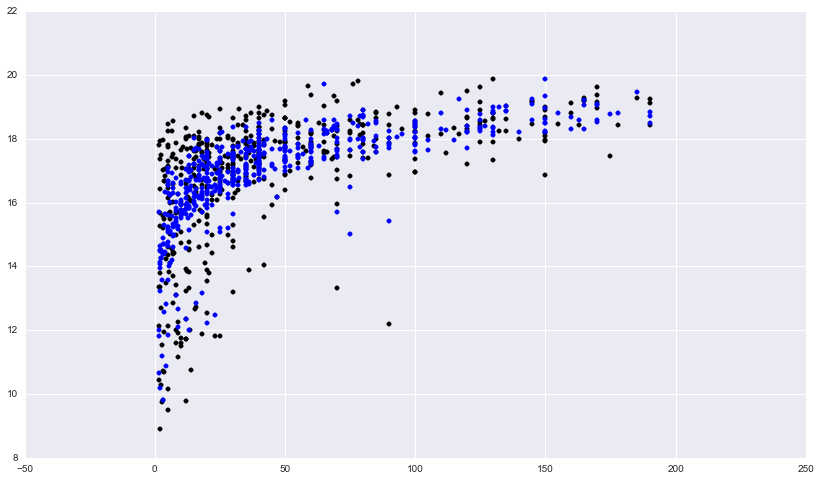

In [20]:
plt.scatter(training_data['Budget2'], np.log(training_data['DomesticTotal']), color ='black')
plt.scatter(training_data['Budget2'], model.predict(training_data), color = 'blue')

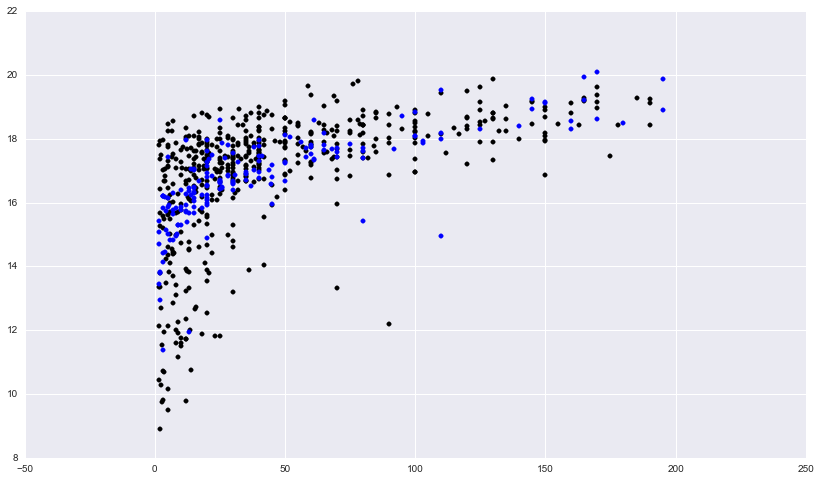

In [21]:
plt.scatter(training_data['Budget2'], np.log(training_data['DomesticTotal']), color ='black')
plt.scatter(test_data['Budget2'], model.predict(test_data), color = 'blue')

In [22]:
test = pd.read_csv('test4.csv', header=0,parse_dates=True)
test


,Unnamed: 0,Title,DomesticTotal,Months,Genre2,Rating,Budget2,Season
0,2,Movie,NaN,July,Romantic,PG,10000000,ASummer
1,2,Movie,NaN,October,Romantic,PG,10000000,Fall
2,3,Movie,NaN,December,Romantic,PG,10000000,Winter
3,0,Movie,NaN,April,Romantic,PG,10000000,Spring


In [23]:
model.predict(test)

array([ 29.27204356,  29.79445952,  29.18702548,  29.43182801])

In [ ]:
#Drama: array([ 28.9229397 ,  28.90059045,  28.69676375,  28.54989444])
#Horror: array([ 30.39016594,  30.36930024,  30.15265284,  30.50614354])
#comedy: array([ 29.95958116,  29.3426381 ,  29.1702759 ,  29.3097122 ])
#Action: array([ 29.33837425,  28.89054586,  29.0651953 ,  29.22568855])
#Romantic: array([ 29.32532407,  31.14134375,  30.04614181,  29.82349318])

In [36]:
movies1000 = movies[:500]

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


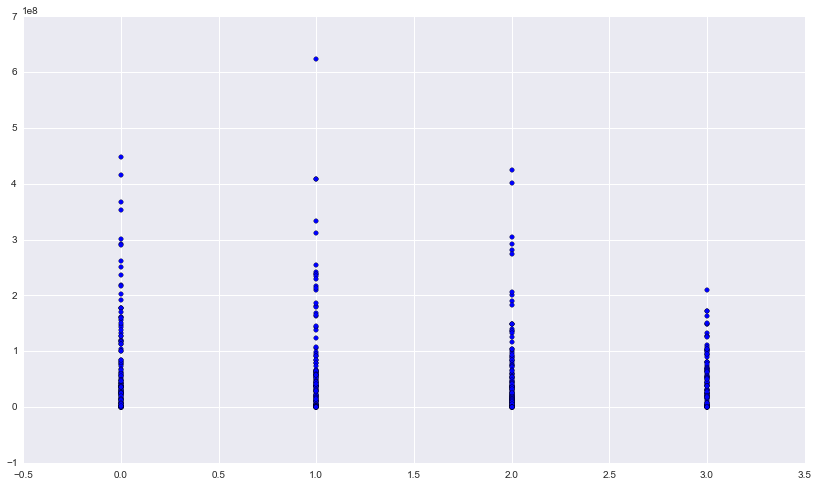

In [60]:
logDomesticTotal = np.log(movies1000["DomesticTotal"])

season_nums = pd.Series([0,1,2,3], index=["ASummer", "Spring", "Fall", "Winter"])
movies1000["season_nums"] = movies1000.Season.map(season_nums)
# plt.title("Movie Revenue By Season", fontweight ='bold')
# plt.xlabel("Seasons", fontweight ='bold')
# plt.ylabel("Total Domestic Gross", fontweight ='bold')
# my_xticks = ["Summer","-","Spring","-","Fall","-","Winter"]
# plt.xticks(movies1000["season_nums"], my_xticks)
plt.scatter(movies1000["season_nums"], movies1000["DomesticTotal"])


/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


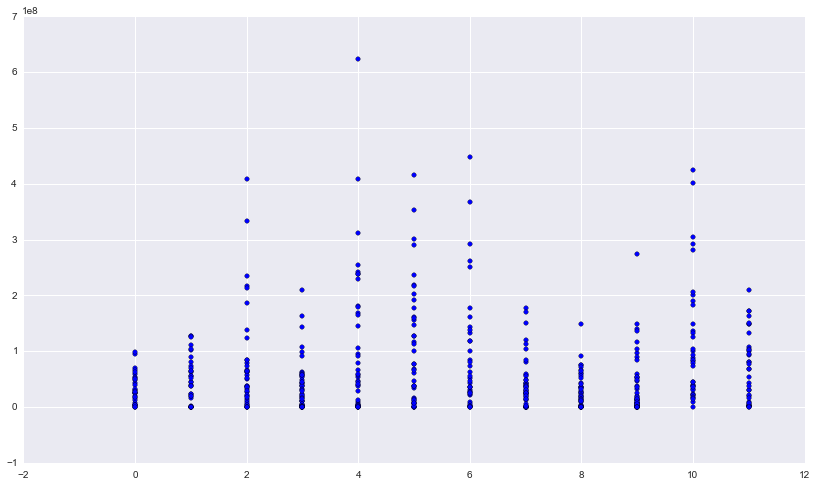

In [62]:
months_nums = pd.Series([0,1,2,3,4,5,6,7,8,9,10,11], index=["January","February","March",
            "April","May","June","July","August","September","October","November","December"])
movies1000["months_nums"] = movies1000.Months.map(months_nums)
#plt.scatter(movies1000["months_nums"], movies1000["DomesticTotal"])

# plt.title("Movie Revenue By Month", fontweight ='bold')
# plt.xlabel("Months", fontweight ='bold')
# plt.ylabel("Total Domestic Gross")
# my_xticks = ("January","February","March",
#             "April","May","June","July","August","September","October","November","December")
# #my_xticks = ('J','F','M','A','M','J','J','A','S','O','N','D')
# plt.xticks(movies1000["months_nums"], my_xticks)
plt.scatter(movies1000["months_nums"], movies1000["DomesticTotal"])


hello
